Data Loading and preprocessing steps

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
df=pd.read_csv("C:/Users/vigne/Desktop/Hate speech detection/Data/Twitterdatainsheets.csv")

C:\Users\vigne\AppData\Local\Temp\ipykernel_34280\664561044.py:1: DtypeWarning: Columns (3,4,5,6,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/vigne/Desktop/Hate speech detection/Data/Twitterdatainsheets.csv")


In [4]:
df.describe()

,index,Reach,RetweetCount,Likes,Klout,Sentiment,LocationID
count,206295.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,103147.000000,8.542396e+03,8.052750,0.152770,40.389260,0.380921,2836.163440
std,59552.381229,8.867027e+04,97.863474,2.583633,13.636513,1.046559,1323.140242
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-6.000000,1.000000
25%,51573.500000,1.510000e+02,0.000000,0.000000,32.000000,0.000000,1601.000000
50%,103147.000000,4.485000e+02,0.000000,0.000000,43.000000,0.000000,3738.000000
75%,154720.500000,1.496000e+03,3.000000,0.000000,49.000000,0.666667,3775.000000
max,206294.000000,1.034245e+07,26127.000000,133.000000,99.000000,7.333333,6289.000000


In [5]:
df.head()

,index,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID
0,0,tw-682712873332805633,Thursday,17,31,en,False,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,1,tw-682713045357998080,Thursday,17,31,en,True,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,2,tw-682713219375476736,Thursday,17,31,en,False,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,3,tw-682713436967579648,Thursday,17,31,en,False,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,4,tw-682714048199311366,Thursday,17,31,en,False,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206295 entries, 0 to 206294
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          206295 non-null  int64  
 1   TweetID        206291 non-null  object 
 2    Weekday       206292 non-null  object 
 3    Hour          106175 non-null  object 
 4    Day           106181 non-null  object 
 5    Lang          106133 non-null  object 
 6    IsReshare     100000 non-null  object 
 7    Reach         100000 non-null  float64
 8    RetweetCount  100000 non-null  float64
 9    Likes         100000 non-null  float64
 10   Klout         100000 non-null  float64
 11   Sentiment     100000 non-null  float64
 12   text          100000 non-null  object 
 13   LocationID    100000 non-null  float64
 14   UserID        100000 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 23.6+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

index            0
TweetID          0
 Weekday         0
 Hour            0
 Day             0
 Lang            0
 IsReshare       0
 Reach           0
 RetweetCount    0
 Likes           0
 Klout           0
 Sentiment       0
 text            0
 LocationID      0
 UserID          0
dtype: int64

In [9]:
df[' Sentiment'].describe()

count    100000.000000
mean          0.380921
std           1.046559
min          -6.000000
25%           0.000000
50%           0.000000
75%           0.666667
max           7.333333
Name:  Sentiment, dtype: float64

In [10]:
# Basic cleaning
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', str(text), flags=re.MULTILINE)
    text = re.sub(r'\@|\#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

df['clean_text'] = df[' text'].apply(clean_text)

In [11]:
# Convert the ' Sentiment' column to numeric, coercing errors to NaN
df[' Sentiment_numeric'] = pd.to_numeric(df[' Sentiment'], errors='coerce')

# Drop rows where the conversion failed
df.dropna(subset=[' Sentiment_numeric'], inplace=True)

# Count rows with specific sentiment categories
count_zero = df[df[' Sentiment_numeric'] == 0].shape[0]
count_negative = df[df[' Sentiment_numeric'] < 0].shape[0]
count_positive = df[df[' Sentiment_numeric'] > 0].shape[0]

# Print the results
print(f"Number of rows with 'Sentiment' value exactly 0: {count_zero}")
print(f"Number of rows with 'Sentiment' value less than 0: {count_negative}")
print(f"Number of rows with 'Sentiment' value more than 0: {count_positive}")

Number of rows with 'Sentiment' value exactly 0: 67424
Number of rows with 'Sentiment' value less than 0: 5552
Number of rows with 'Sentiment' value more than 0: 27024


In [12]:
# Convert the ' Sentiment' column to numeric, coercing errors to NaN
df[' Sentiment_numeric'] = pd.to_numeric(df[' Sentiment'], errors='coerce')

# Drop rows where the conversion failed
df.dropna(subset=[' Sentiment_numeric'], inplace=True)

# Assign labels based on sentiment value
def classify_sentiment(value):
    if value == 0:
        return 'Neutral'
    elif value < 0:
        return 'Hate'
    else:
        return 'Non-Hate'

df['label'] = df[' Sentiment_numeric'].apply(classify_sentiment)

# print value counts for each class
print(df['label'].value_counts())

label
Neutral     67424
Non-Hate    27024
Hate         5552
Name: count, dtype: int64


In [13]:
df['label'].value_counts()

label
Neutral     67424
Non-Hate    27024
Hate         5552
Name: count, dtype: int64

In [18]:
!pip install matplotlib seaborn


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
import sys
sys.executable


'c:\\Users\\vigne\\AppData\\Local\\Programs\\Python\\Python313\\python.exe'

In [20]:
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

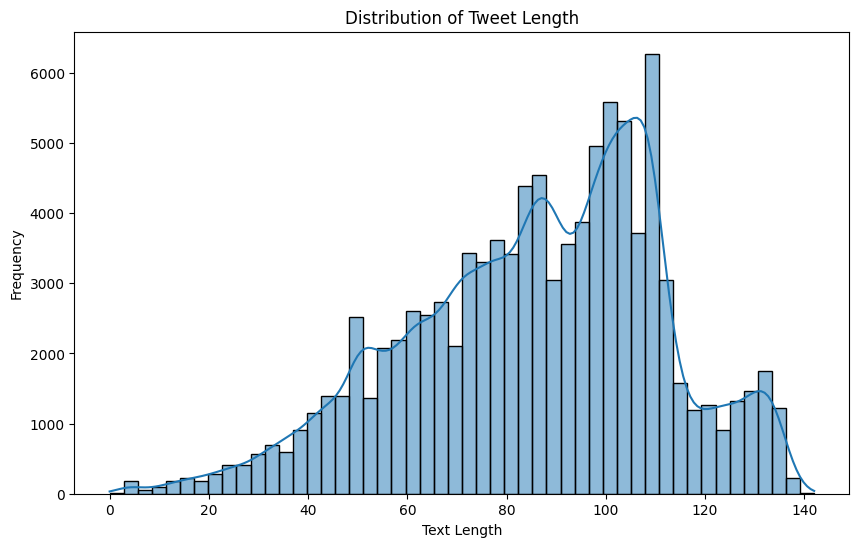

In [21]:
# Tweet Length Distribution
df['text_length'] = df['clean_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

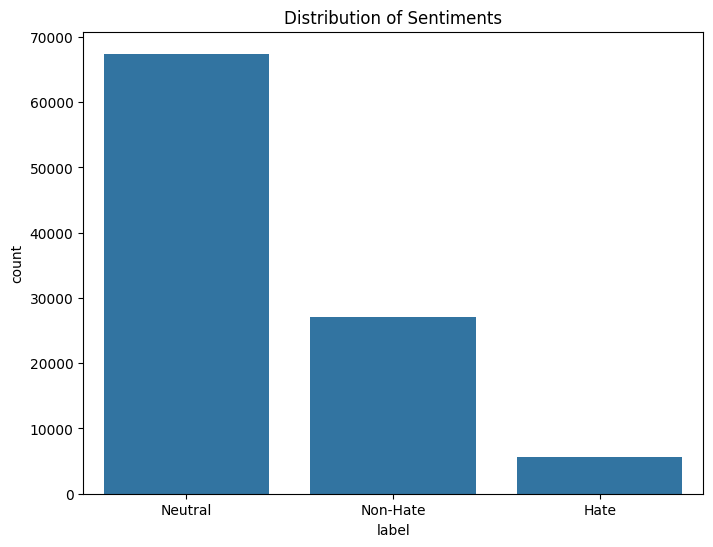

In [22]:
# Plotting the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Sentiments')
plt.show()

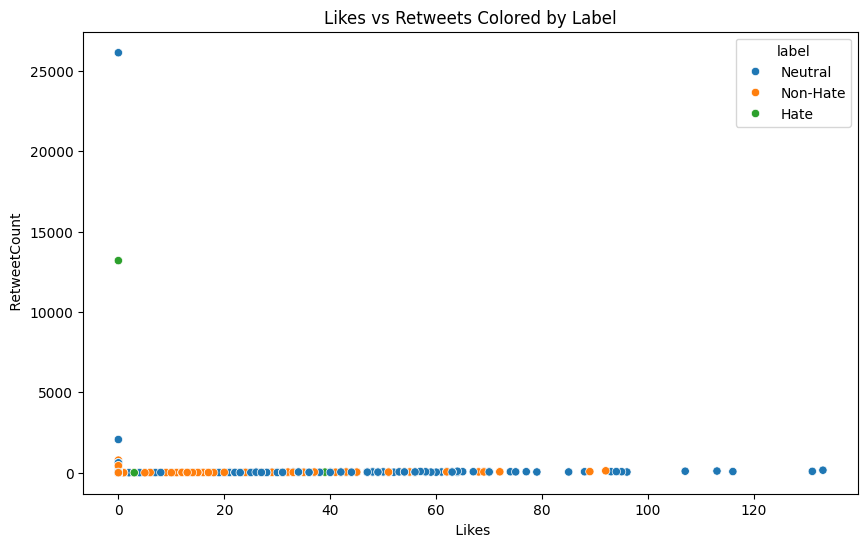

In [23]:
# Likes vs Retweets
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Likes', y=' RetweetCount', hue='label', data=df)
plt.title('Likes vs Retweets Colored by Label')
plt.show()

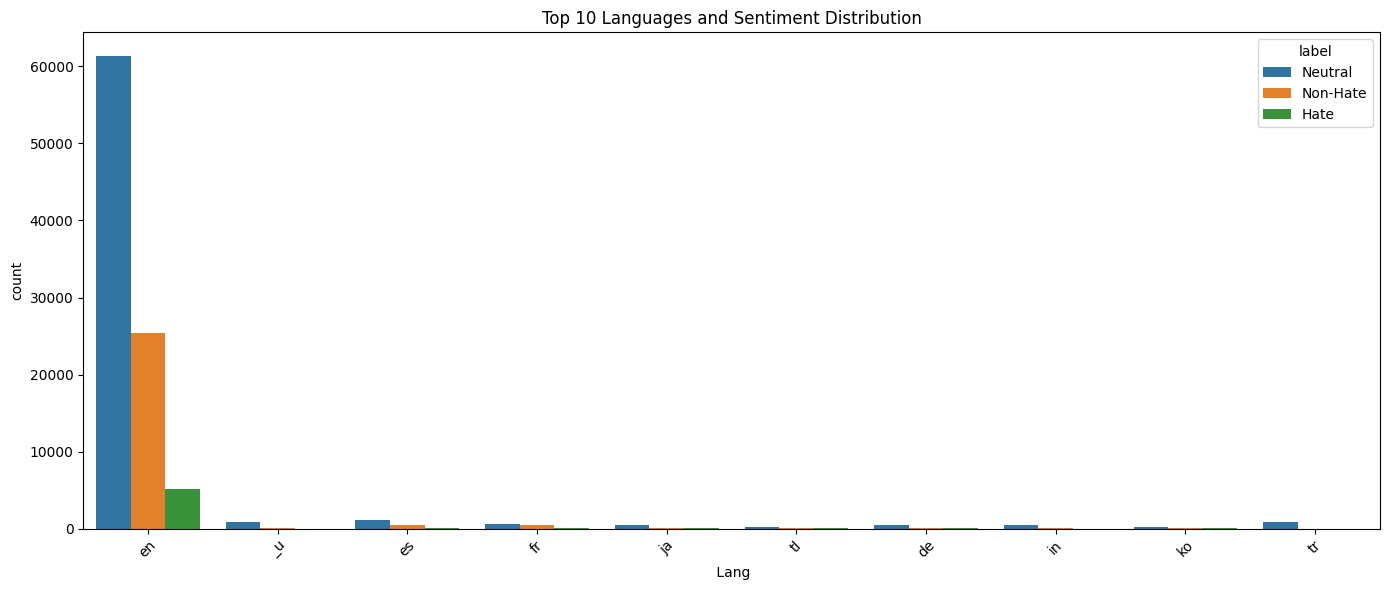

In [24]:
# Sentiment by Language
plt.figure(figsize=(14, 6))
top_langs = df[' Lang'].value_counts().nlargest(10).index
sns.countplot(data=df[df[' Lang'].isin(top_langs)], x=' Lang', hue='label')
plt.title('Top 10 Languages and Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

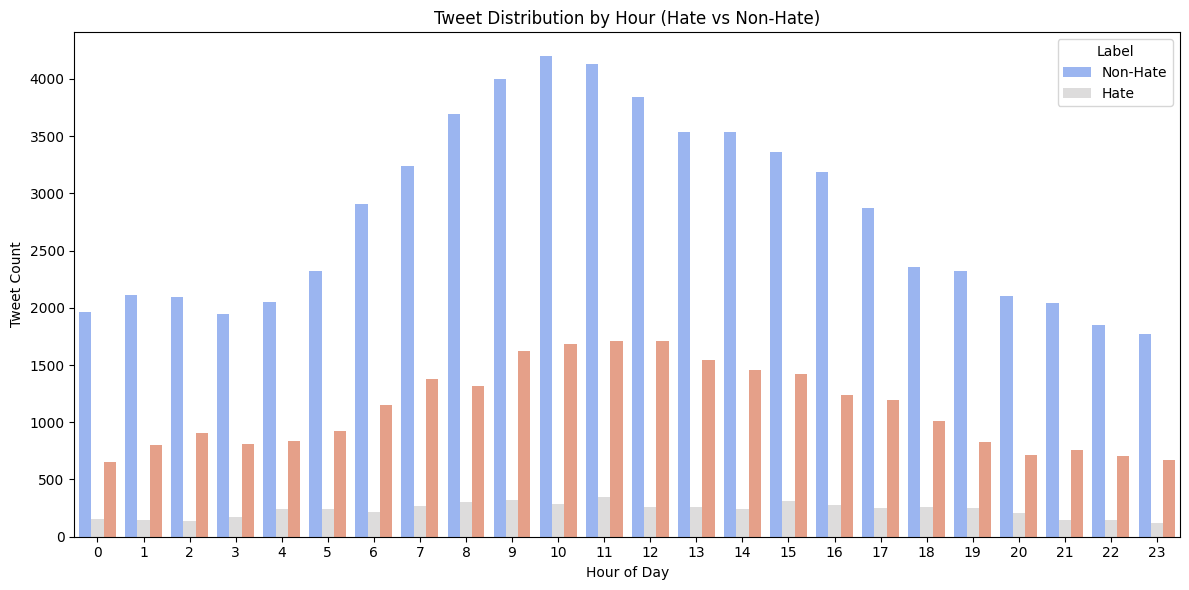

In [25]:
# Hate vs Non-Hate Tweet Count by Hour
df['Hour'] = pd.to_numeric(df[' Hour'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.countplot(data=df.dropna(subset=['Hour']), x='Hour', hue='label', palette='coolwarm')
plt.title('Tweet Distribution by Hour (Hate vs Non-Hate)')
plt.xlabel('Hour of Day')
plt.ylabel('Tweet Count')
plt.legend(title='Label', labels=['Non-Hate', 'Hate'])
plt.tight_layout()
plt.show()

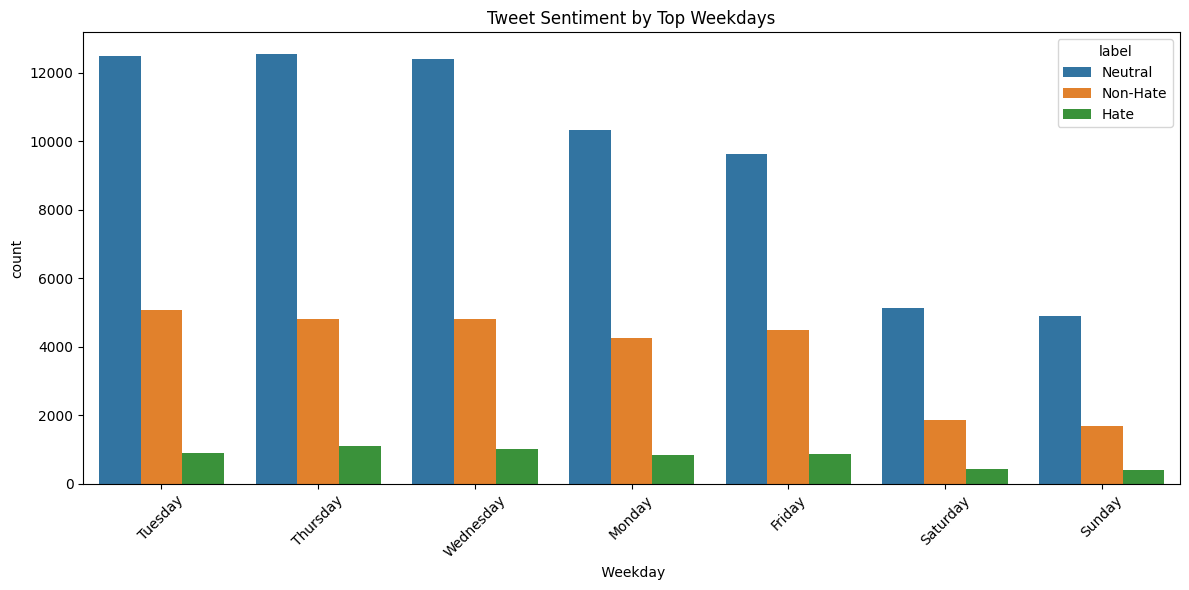

In [26]:
# Get the top 15 most frequent weekdays
top_weekdays = df[' Weekday'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top weekdays
df_top_weekdays = df[df[' Weekday'].isin(top_weekdays)]

# Plotting the distribution of sentiments for top weekdays
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_weekdays, x=' Weekday', hue='label', order=top_weekdays)
plt.title('Tweet Sentiment by Top Weekdays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

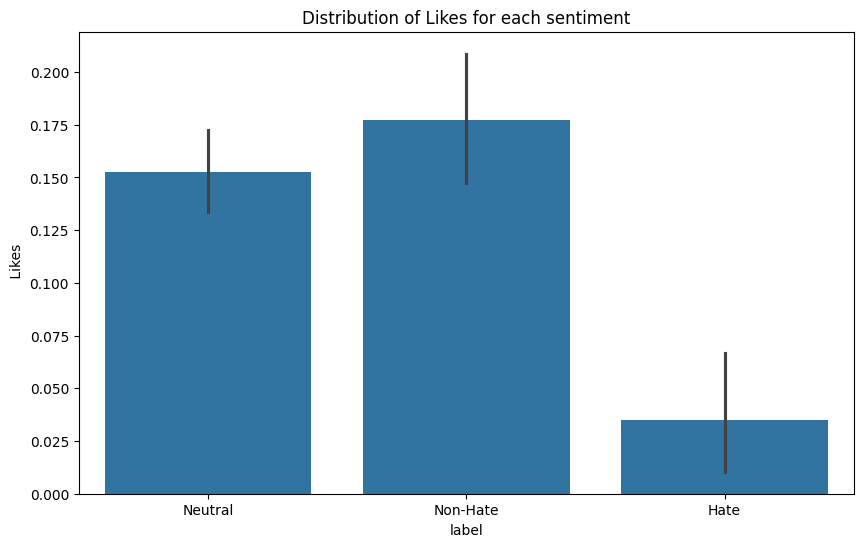

In [27]:
# Plotting the distribution of likes for each sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y=' Likes', data=df)
plt.title('Distribution of Likes for each sentiment')
plt.show()

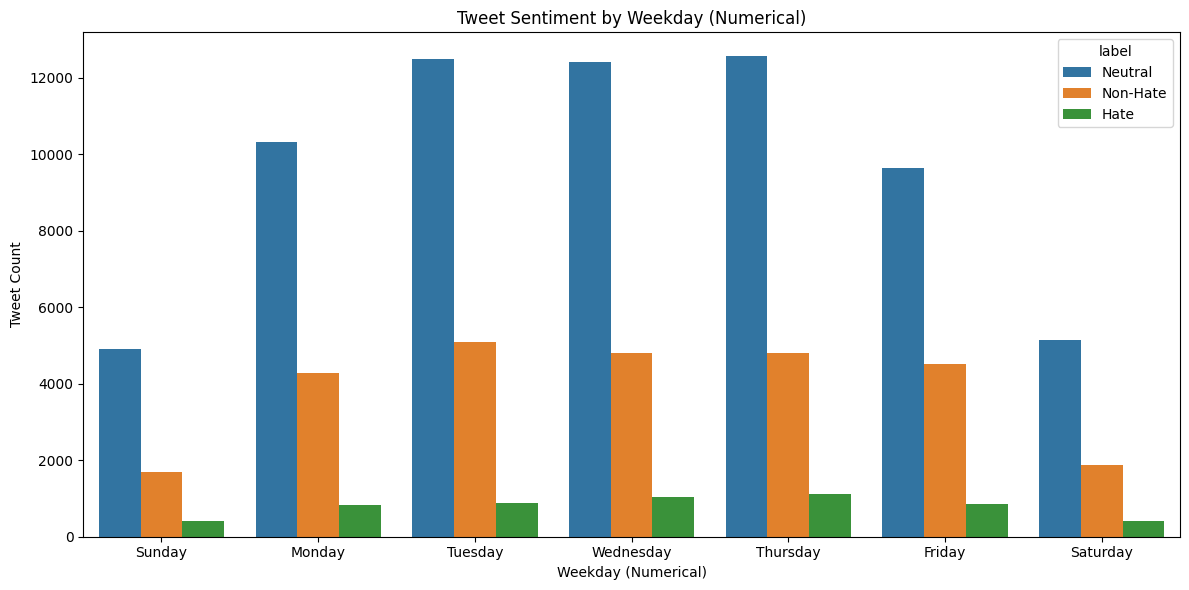

In [28]:
# Sentiment by Weekday
weekday_mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}
df['Weekday_float'] = df[' Weekday'].map(weekday_mapping)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Weekday_float', hue='label')
plt.title('Tweet Sentiment by Weekday (Numerical)')
plt.xlabel('Weekday (Numerical)')
plt.ylabel('Tweet Count')
plt.xticks(range(7), weekday_mapping.keys())
plt.tight_layout()
plt.show()

In [36]:
# Feature engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [37]:
# TF-IDF features from text
tfidf = TfidfVectorizer(max_features=3000)
X_text = tfidf.fit_transform(df['clean_text'])

In [38]:
# Additional features
X_extra = df[[' Likes', ' RetweetCount','Weekday_float',' IsReshare',' Reach','text_length']].fillna(0).astype(float).values

C:\Users\vigne\AppData\Local\Temp\ipykernel_34280\3039689254.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_extra = df[[' Likes', ' RetweetCount','Weekday_float',' IsReshare',' Reach','text_length']].fillna(0).astype(float).values


In [39]:
# Combine text + engagement
from scipy.sparse import hstack
X_combined = hstack([X_text, X_extra])

y = df['label']

In [40]:
# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y)

C:\Users\vigne\AppData\Local\Temp\ipykernel_34280\1408352693.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette='Set2')
C:\Users\vigne\AppData\Local\Temp\ipykernel_34280\1408352693.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=axes[1], palette='Set2')


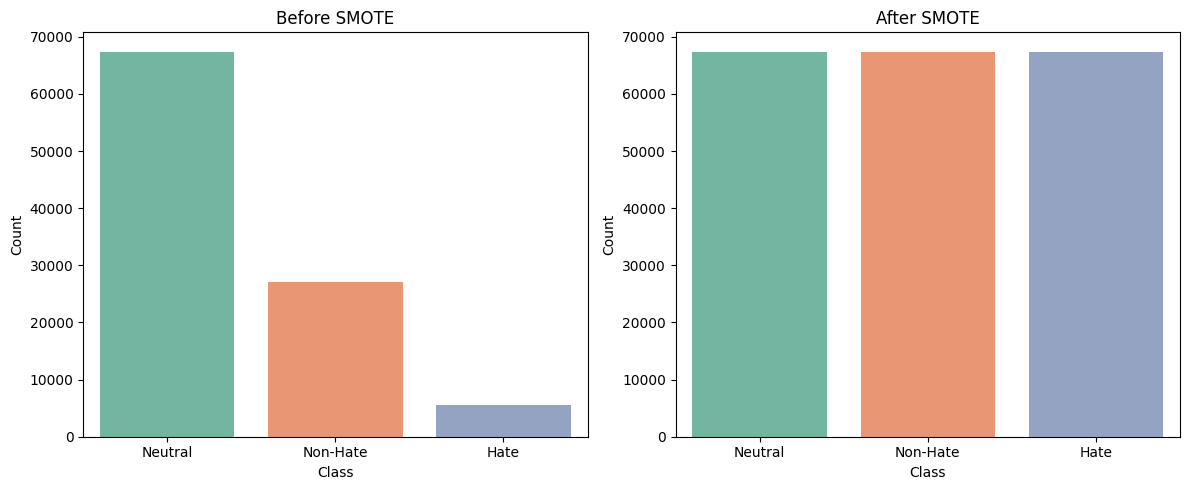

Class distribution before SMOTE: Counter({'Neutral': 67424, 'Non-Hate': 27024, 'Hate': 5552})
Class distribution after SMOTE: Counter({'Neutral': 67424, 'Non-Hate': 67424, 'Hate': 67424})


In [41]:
# After applying SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y, ax=axes[0], palette='Set2')
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1], palette='Set2')
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Optional: Show exact counts
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))


In [42]:
# Feature engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


In [54]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [55]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
# Fit training data to model
rf.fit(X_train_s, y_train_s)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
# Make Prediction
y_pred_rf = rf.predict(X_test_s)

In [59]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.sparse import hstack

In [60]:
# Model Evaluation
accuracy_rf = accuracy_score(y_test_s, y_pred_rf)
precision_rf = precision_score(y_test_s, y_pred_rf, average='macro')
recall_rf = recall_score(y_test_s, y_pred_rf, average='macro')
f1_rf = f1_score(y_test_s, y_pred_rf, average='macro')

In [61]:
print("Random Forest : ")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Random Forest : 
Accuracy: 0.9574589049561241
Precision: 0.9584933888986719
Recall: 0.9575604946333676


In [62]:
# Classification Report
print(classification_report(y_test_s, y_pred_rf))

              precision    recall  f1-score   support

        Hate       0.98      0.98      0.98     13396
     Neutral       0.92      0.97      0.95     13509
    Non-Hate       0.97      0.92      0.95     13550

    accuracy                           0.96     40455
   macro avg       0.96      0.96      0.96     40455
weighted avg       0.96      0.96      0.96     40455



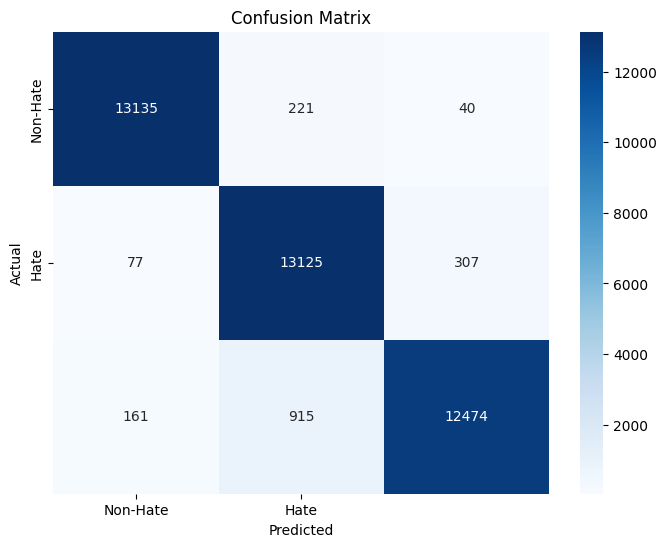

In [63]:
# Plot Confusioon matrix
cm = confusion_matrix(y_test_s, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

In [64]:
# Load Model
nb = MultinomialNB()

In [65]:
# Fit training data to model
nb.fit(X_train_s, y_train_s)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [66]:
# Make Prediction
y_pred_nb = nb.predict(X_test_s)

In [67]:
# Model Evaluation
accuracy_nb = accuracy_score(y_test_s, y_pred_nb)
precision_nb = precision_score(y_test_s, y_pred_nb, average='macro')
recall_nb = recall_score(y_test_s, y_pred_nb, average='macro')
f1_nb = f1_score(y_test_s, y_pred_nb, average='macro')

In [68]:
print("Naive Bayes : ")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)

Naive Bayes : 
Accuracy: 0.3439871462118403
Precision: 0.4247687779837075
Recall: 0.34587954065975807


In [69]:
# Classification Report
print(classification_report(y_test_s, y_pred_nb))

              precision    recall  f1-score   support

        Hate       0.34      0.93      0.50     13396
     Neutral       0.59      0.04      0.07     13509
    Non-Hate       0.35      0.08      0.12     13550

    accuracy                           0.34     40455
   macro avg       0.42      0.35      0.23     40455
weighted avg       0.42      0.34      0.23     40455



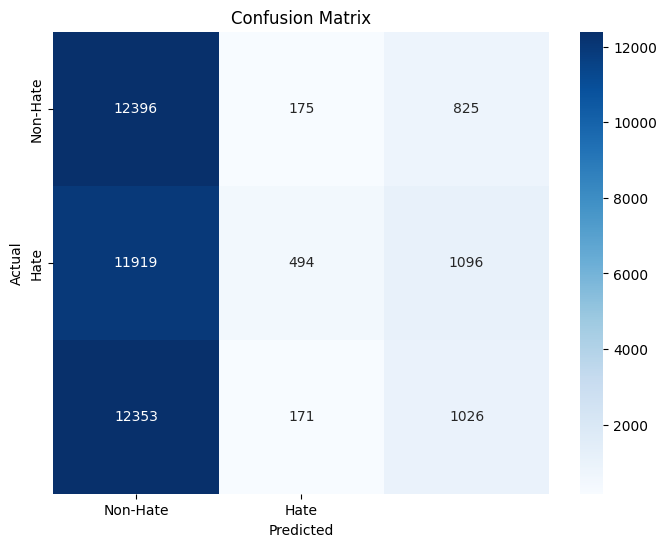

In [70]:
# Ploting confusion matirx
cm = confusion_matrix(y_test_s, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()